In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset1/finance_headlines (1).csv
/kaggle/input/data-set-3/finance_headlines3.csv
/kaggle/input/dataset-2/finance_headlines2.csv
/kaggle/input/from-2024/finance_headlines5.csv
/kaggle/input/dataset-4/finance_headlines4.csv


In [2]:
csv_files = ['/kaggle/input/dataset-4/finance_headlines4.csv','/kaggle/input/data-set-3/finance_headlines3.csv', '/kaggle/input/dataset-2/finance_headlines2.csv', '/kaggle/input/dataset1/finance_headlines (1).csv','/kaggle/input/from-2024/finance_headlines5.csv']

# Read and concatenate all CSV files
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Save to a new CSV file
merged_df.to_csv('merged.csv', index=False)

In [3]:
df=pd.read_csv('/kaggle/working/merged.csv')
df

,published_date,headlines
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi..."
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc..."
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra..."
...,...,...
615,2024-06-03,['A Sticking Point in Paramount and Skydance T...
616,2024-06-04,['The Low-Key British Newshound Taking Charge ...
617,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...
618,2024-06-06,"['Restructuring Leads to Layoffs at Little, Br..."


In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 40.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=a5bcb79f4ede1535b7d80d2f8c7984e45929b33455cfd67b3b9fdfc1ceeb84e4
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [5]:
import yfinance as yf


# Define the stock ticker and the date range
ticker = '^DJI'
start_date = '2010-01-01'
end_date = '2024-06-17'

# Fetch the historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
stock_data.to_csv(f'{ticker}_stock_data_{start_date}_to_{end_date}.csv')

print(f'Stock data for {ticker} from {start_date} to {end_date} has been saved to CSV.')

[*********************100%%**********************]  1 of 1 completed

Stock data for ^DJI from 2010-01-01 to 2024-06-17 has been saved to CSV.


In [6]:
stock_data=pd.read_csv('/kaggle/working/^DJI_stock_data_2010-01-01_to_2024-06-17.csv')
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
3,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
4,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...,...
3632,2024-06-10,38784.898438,38877.859375,38665.449219,38868.039062,38868.039062,330580000
3633,2024-06-11,38795.710938,38795.710938,38446.238281,38747.421875,38747.421875,383090000
3634,2024-06-12,38950.648438,39120.261719,38621.449219,38712.210938,38712.210938,472280000
3635,2024-06-13,38677.121094,38712.210938,38407.699219,38647.101562,38647.101562,341330000


In [7]:
stock_data.rename(columns={'Date': 'published_date'}, inplace=True)
stock_data

,published_date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
3,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
4,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...,...
3632,2024-06-10,38784.898438,38877.859375,38665.449219,38868.039062,38868.039062,330580000
3633,2024-06-11,38795.710938,38795.710938,38446.238281,38747.421875,38747.421875,383090000
3634,2024-06-12,38950.648438,39120.261719,38621.449219,38712.210938,38712.210938,472280000
3635,2024-06-13,38677.121094,38712.210938,38407.699219,38647.101562,38647.101562,341330000


In [8]:
df['published_date'] = pd.to_datetime(df['published_date'])
stock_data['published_date'] = pd.to_datetime(stock_data['published_date'])
stock_data['published_date'] = stock_data['published_date'] - pd.Timedelta(days=1)

In [9]:
stock_data_news=pd.merge(df,stock_data,on=('published_date'),how='inner')
stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000
...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000


In [10]:
stock_data_news.headlines[20]

"['Galleon Jurors Review More Taped Phone Calls', 'Chrysler Expected to Erase Its Debt to Government', 'In Trying to Debunk a Theory, the News Media Extended Its Life', 'With Deal, J.&J. Tries to Change Discussion', 'A.I.G. to Sue 2 Firms to Recover Some Losses', 'Hubert Schlafly, Who Helped Build Teleprompter, Is Dead at 91', 'CNBC’s Burnett Is Said Ready to Jump to CNN', 'Shortcuts for Quicker iPhone Use', 'Japanese Central Bank Cuts Growth Forecast', 'The Problem With the F.D.I.C.’s Powers', 'Deutsche Bank Posts Strong Profit, While Santander Slips', 'Helping Small Businesses That Really Know About Ups and Downs', 'Profit Jumps at Exxon and Shell', 'Exelon to Buy Constellation Energy for $7.9 Billion', 'Germany’s Low Unemployment Rate Stokes Inflation Fears', 'Panasonic to Cut 17,000 Jobs', 'Live From the NYSE Shareholders Meeting', 'U.S. Economic Growth Slows to 1.8% Rate in Quarter', 'Berkshire Fires Back Against Sokol’s Lawyer', 'David Sokol, the Deal Maker', 'Wall Street Higher 

In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
stock_data_news['Subjectivity']=stock_data_news['headlines'].apply(getSubjectivity)
stock_data_news['Polarity']=stock_data_news['headlines'].apply(getPolarity)

In [15]:
stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492
...,...,...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000,0.436953,0.090067
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000,0.241667,-0.012179
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000,0.266667,0.133333
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000,0.520491,-0.002742


In [16]:
def getSIA(text):
    sia=SentimentIntensityAnalyzer()
    sentiment=sia.polarity_scores(text)
    return sentiment

In [17]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0


for i in range (0,len(stock_data_news['headlines'])):
    SIA=getSIA(stock_data_news['headlines'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])
    
    


In [18]:
stock_data_news['Compound']=compound
stock_data_news['Negative']=neg
stock_data_news['Neutral']=neu
stock_data_news['Positive']=pos

In [19]:
stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000,0.436953,0.090067,0.8253,0.063,0.820,0.117
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000,0.241667,-0.012179,-0.8519,0.119,0.824,0.057
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000,0.266667,0.133333,0.6444,0.075,0.788,0.136
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000,0.520491,-0.002742,-0.4588,0.110,0.804,0.086


In [20]:

def label_rows(row):
    differenceperc = (row['Close'] - row['Open'])/row['Open']
    if differenceperc > 0.005:
        return 1
    elif differenceperc<-0.005 :
        return -1
    else:
        return 0
    
   

In [21]:
stock_data_news['Label'] = stock_data_news.apply(label_rows, axis=1)

In [22]:
stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000,1
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028,0
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092,0
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092,1
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000,0.436953,0.090067,0.8253,0.063,0.820,0.117,0
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000,0.241667,-0.012179,-0.8519,0.119,0.824,0.057,0
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000,0.266667,0.133333,0.6444,0.075,0.788,0.136,0
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000,0.520491,-0.002742,-0.4588,0.110,0.804,0.086,0


In [23]:
stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000,1
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028,0
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092,0
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092,1
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000,0.436953,0.090067,0.8253,0.063,0.820,0.117,0
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000,0.241667,-0.012179,-0.8519,0.119,0.824,0.057,0
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000,0.266667,0.133333,0.6444,0.075,0.788,0.136,0
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000,0.520491,-0.002742,-0.4588,0.110,0.804,0.086,0


In [24]:
stock_data_news['published_date'] = pd.to_datetime(stock_data_news['published_date'])

# Define the cutoff date
cutoff_date = pd.to_datetime('2024-01-01')

# Collect rows from the DataFrame after the cutoff date
test_data = stock_data_news[stock_data_news['published_date'] > cutoff_date]

In [25]:
stock_data_news['published_date'] = pd.to_datetime(stock_data_news['published_date'])

# Define the cutoff date
cutoff_date = pd.to_datetime('2024-01-01')

# Collect rows from the DataFrame after the cutoff date
train_data = stock_data_news[stock_data_news['published_date'] < cutoff_date]

In [26]:
train_data

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000,1
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028,0
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092,0
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092,1
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2023-11-09,['Striking Actors and Hollywood Studios Agree ...,34020.820312,34310.359375,33905.621094,34283.101562,34283.101562,302460000,0.385382,0.100182,-0.7545,0.124,0.782,0.094,1
407,2023-12-10,['The Book World Still Isn’t Diverse. Dhoniell...,36254.328125,36416.179688,36231.191406,36404.929688,36404.929688,342490000,0.225000,0.075000,-0.1298,0.067,0.881,0.051,0
408,2023-12-11,['Investor Group Is Said to Value Macy’s at $5...,36442.101562,36596.109375,36373.218750,36577.941406,36577.941406,292770000,0.309764,0.142003,0.8205,0.050,0.816,0.133,0
409,2023-12-12,['Google Loses Antitrust Court Battle With Mak...,36601.800781,37094.851562,36523.589844,37090.238281,37090.238281,354790000,0.305128,0.005769,-0.9712,0.192,0.754,0.053,1


In [27]:
test_data

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
412,2024-01-02,['India Is Chasing China’s Economy. But Someth...,37629.230469,37629.230469,37401.851562,37430.191406,37430.191406,322010000,0.500000,0.000000,-0.4215,0.056,0.944,0.000,-1
413,2024-01-03,['Will America’s Good News on Inflation Last?'...,37425.281250,37716.410156,37425.281250,37440.339844,37440.339844,380220000,0.533333,0.148333,0.8074,0.126,0.639,0.235,0
414,2024-01-04,['U.S. Awards Chip Supplier $162 Million to Bo...,37455.460938,37623.621094,37323.820312,37466.109375,37466.109375,299480000,0.456667,0.120417,-0.5994,0.158,0.782,0.060,0
415,2024-01-21,['The Hottest Buzzword in Wellness Seeps Into ...,37919.550781,38109.199219,37911.609375,38001.808594,38001.808594,339560000,0.300000,0.200000,-0.7906,0.277,0.642,0.081,0
416,2024-01-22,['F.A.A. Tells Airlines to Check Panels on a S...,37959.789062,37980.730469,37804.988281,37905.449219,37905.449219,334110000,0.279545,0.153030,-0.4118,0.064,0.877,0.059,0
417,2024-01-23,['China’s Travel Economy Is Slowly Coming Back...,37975.371094,38064.218750,37795.710938,37806.390625,37806.390625,336090000,0.525053,0.039209,0.8519,0.062,0.798,0.140,0
418,2024-01-24,['How Did a Boeing Jet End Up With a Big Hole?...,37862.570312,38057.531250,37796.468750,38049.128906,38049.128906,402970000,0.326840,0.131385,-0.6369,0.093,0.851,0.056,0
419,2024-01-25,['Boeing Reinstalled Panel That Later Blew Out...,38006.679688,38215.308594,37997.769531,38109.429688,38109.429688,387000000,0.342823,0.042584,-0.8689,0.086,0.869,0.045,0
420,2024-02-25,"['Why Microsoft Has Accepted Unions, Unlike It...",39144.789062,39245.890625,39025.800781,39069.230469,39069.230469,296930000,0.355556,-0.122222,0.2960,0.120,0.741,0.140,0
421,2024-02-26,['What Happened When Saudi Arabia Took its Mon...,39087.898438,39087.898438,38881.898438,38972.410156,38972.410156,272860000,0.423906,0.121801,-0.8674,0.160,0.796,0.044,0


In [28]:
keep_columns=['Open','High','Low','Close','Adj Close','Volume','Subjectivity','Polarity','Compound','Negative','Neutral','Positive','Label']
dealnumber=train_data[keep_columns]
dealnumber

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000,1
1,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028,0
2,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092,0
3,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092,1
4,10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,34020.820312,34310.359375,33905.621094,34283.101562,34283.101562,302460000,0.385382,0.100182,-0.7545,0.124,0.782,0.094,1
407,36254.328125,36416.179688,36231.191406,36404.929688,36404.929688,342490000,0.225000,0.075000,-0.1298,0.067,0.881,0.051,0
408,36442.101562,36596.109375,36373.218750,36577.941406,36577.941406,292770000,0.309764,0.142003,0.8205,0.050,0.816,0.133,0
409,36601.800781,37094.851562,36523.589844,37090.238281,37090.238281,354790000,0.305128,0.005769,-0.9712,0.192,0.754,0.053,1


In [29]:
keep_columns=['Open','High','Low','Close','Adj Close','Volume','Subjectivity','Polarity','Compound','Negative','Neutral','Positive','Label']
dealnumber2=test_data[keep_columns]
dealnumber2

,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
412,37629.230469,37629.230469,37401.851562,37430.191406,37430.191406,322010000,0.500000,0.000000,-0.4215,0.056,0.944,0.000,-1
413,37425.281250,37716.410156,37425.281250,37440.339844,37440.339844,380220000,0.533333,0.148333,0.8074,0.126,0.639,0.235,0
414,37455.460938,37623.621094,37323.820312,37466.109375,37466.109375,299480000,0.456667,0.120417,-0.5994,0.158,0.782,0.060,0
415,37919.550781,38109.199219,37911.609375,38001.808594,38001.808594,339560000,0.300000,0.200000,-0.7906,0.277,0.642,0.081,0
416,37959.789062,37980.730469,37804.988281,37905.449219,37905.449219,334110000,0.279545,0.153030,-0.4118,0.064,0.877,0.059,0
417,37975.371094,38064.218750,37795.710938,37806.390625,37806.390625,336090000,0.525053,0.039209,0.8519,0.062,0.798,0.140,0
418,37862.570312,38057.531250,37796.468750,38049.128906,38049.128906,402970000,0.326840,0.131385,-0.6369,0.093,0.851,0.056,0
419,38006.679688,38215.308594,37997.769531,38109.429688,38109.429688,387000000,0.342823,0.042584,-0.8689,0.086,0.869,0.045,0
420,39144.789062,39245.890625,39025.800781,39069.230469,39069.230469,296930000,0.355556,-0.122222,0.2960,0.120,0.741,0.140,0
421,39087.898438,39087.898438,38881.898438,38972.410156,38972.410156,272860000,0.423906,0.121801,-0.8674,0.160,0.796,0.044,0


In [30]:
X_test=dealnumber2
X_test=dealnumber2.drop(columns='Label')

y_test=dealnumber2['Label']

In [31]:
X_train=dealnumber
X_train=dealnumber.drop(columns='Label')

y_train=dealnumber['Label']


In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
model2=LinearDiscriminantAnalysis().fit(X_train,y_train)
prediction2=model2.predict(X_test)

In [35]:
model.score(X_train,y_train)

1.0

In [36]:
model.score(X_test,y_test)

0.9130434782608695

In [37]:
predictions=model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.91      1.00      0.95        21

    accuracy                           0.91        23
   macro avg       0.46      0.50      0.48        23
weighted avg       0.83      0.91      0.87        23



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         2
           0       0.95      1.00      0.98        21

    accuracy                           0.96        23
   macro avg       0.98      0.75      0.82        23
weighted avg       0.96      0.96      0.95        23



In [40]:
# Define buy and sell signals based on sentiment
stock_data_news['Signal'] = 0
stock_data_news.loc[stock_data_news['Compound'] > 0.1,'Signal'] = 1
stock_data_news.loc[stock_data_news['Compound'] < 0.1, 'Signal'] = -1


In [41]:
stock_data_news['daily_return'] = stock_data_news['Adj Close'].pct_change()

stock_data_news['strategy_return'] = stock_data_news['Signal'].shift(1) * stock_data_news['daily_return']
stock_data_news['cumulative_return'] = (1 + stock_data_news['strategy_return']).cumprod()

In [42]:

stock_data_news

,published_date,headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label,Signal,daily_return,strategy_return,cumulative_return
0,2010-01-03,"['Market Madness', 'Lax Oversight Caused Crisi...",10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000,0.000000,0.000000,-0.7906,0.500,0.500,0.000,1,-1,NaN,NaN,NaN
1,2010-01-04,"['Firms Selling Apps for Simple Phones', 'Watc...",10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000,0.233144,-0.035755,-0.9217,0.080,0.891,0.028,0,-1,-0.001128,0.001128,1.001128
2,2010-02-09,['Judge Questions Bank of America’s New Deal W...,10055.459961,10085.540039,9962.959961,10038.379883,10038.379883,178600000,0.466522,0.010750,0.7964,0.052,0.857,0.092,0,1,-0.050477,0.050477,1.051662
3,2010-02-10,['Rothschild to Appoint First Non-Family C.E.O...,10037.849609,10161.570312,9976.709961,10144.190430,10144.190430,194470000,0.275842,0.048053,-0.2492,0.102,0.806,0.092,1,-1,0.010541,0.010541,1.062747
4,2010-03-18,"['Time Seems Right for Paypal to Fly', 'Progra...",10780.000000,10819.900391,10694.219727,10741.980469,10741.980469,434190000,0.522937,0.103492,-0.9517,0.170,0.732,0.098,0,-1,0.058929,-0.058929,1.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2024-05-06,"['ABC News’s President, Kim Godwin, to Step Do...",38858.941406,38977.609375,38840.398438,38884.261719,38884.261719,360930000,0.436953,0.090067,0.8253,0.063,0.820,0.117,0,1,0.000823,-0.000823,0.431568
431,2024-06-03,['A Sticking Point in Paramount and Skydance T...,38518.859375,38786.621094,38397.820312,38711.289062,38711.289062,304450000,0.241667,-0.012179,-0.8519,0.119,0.824,0.057,0,-1,-0.004448,-0.004448,0.429648
432,2024-06-04,['The Low-Key British Newshound Taking Charge ...,38774.820312,38844.320312,38548.769531,38807.328125,38807.328125,310970000,0.266667,0.133333,0.6444,0.075,0.788,0.136,0,1,0.002481,-0.002481,0.428583
433,2024-06-05,['E.C.B. Is Likely to Leapfrog the Fed on Inte...,38825.398438,39004.160156,38735.988281,38886.171875,38886.171875,269000000,0.520491,-0.002742,-0.4588,0.110,0.804,0.086,0,-1,0.002032,0.002032,0.429453


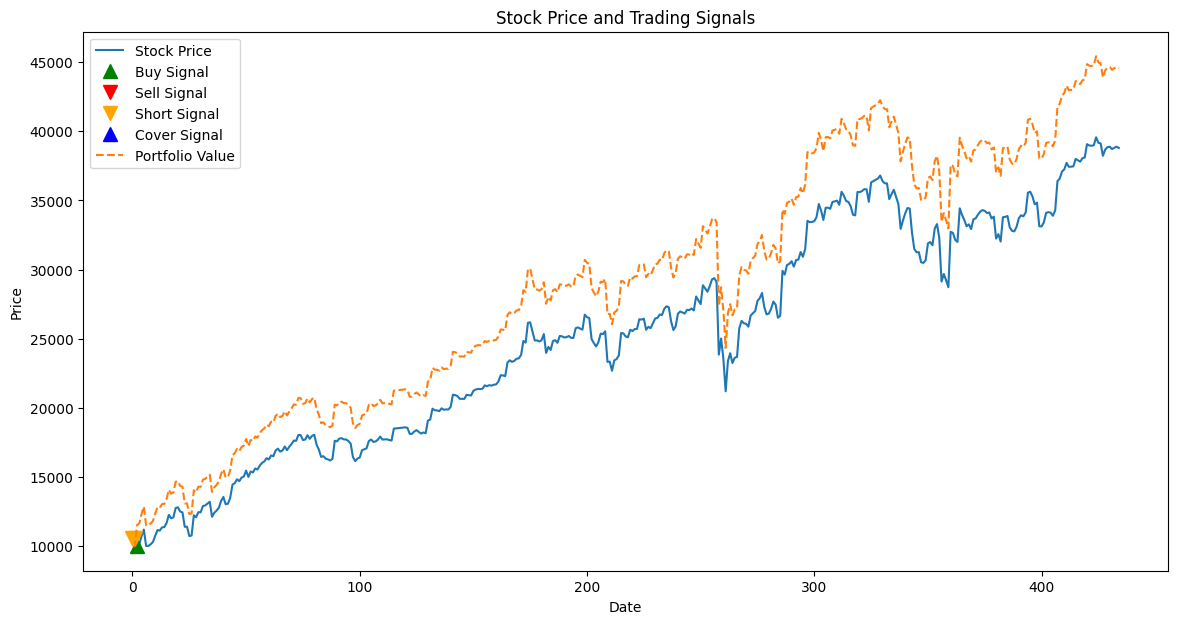

Final Cash: $0.00
Final Shares: 3.98
Final Short Shares: 2.84
Final Portfolio Value: $44544.91
Portfolio Return: 345.45%
Sharpe Ratio: 2.16
Maximum Drawdown: -27.84%
Number of Trades Executed: 1
Win Ratio: 0.00%


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Define thresholds for stop-loss and take-profit
stop_loss_threshold = -0.1  # Stop-loss threshold at 10% loss
take_profit_threshold = 0.1  # Take-profit threshold at 10% gain

# Initialize trading variables
initial_cash = 10000
cash = initial_cash
shares = 0
short_shares = 0
portfolio_value = []
buy_signals = []
sell_signals = []
short_signals = []
cover_signals = []
entry_price = None

# Simulate trading
for i in range(len(stock_data_news)):
    if stock_data_news['Signal'][i] == 1:  # Buy
        if cash > 0:
            shares_to_buy = cash / stock_data_news['Close'][i]
            shares += shares_to_buy
            cash -= shares_to_buy * stock_data_news['Close'][i]
            entry_price = stock_data_news['Close'][i]
            buy_signals.append(i)
    elif stock_data_news['Signal'][i] == -1:  # Short
        if cash > 0:
            shares_to_short = cash / stock_data_news['Close'][i]
            short_shares += shares_to_short
            cash += shares_to_short * stock_data_news['Close'][i]
            entry_price = stock_data_news['Close'][i]
            short_signals.append(i)
    elif stock_data_news['Signal'][i] == 0:  # Close positions
        if shares > 0:
            # Check for stop-loss or take-profit
            if (stock_data_news['Close'][i] <= entry_price * (1 + stop_loss_threshold)) or (stock_data_news['Close'][i] >= entry_price * (1 + take_profit_threshold)):
                cash += shares * stock_data_news['Close'][i]
                shares = 0
                sell_signals.append(i)
        elif short_shares > 0:
            # Check for stop-loss or take-profit
            if (stock_data_news['Close'][i] >= entry_price * (1 + stop_loss_threshold)) or (stock_data_news['Close'][i] <= entry_price * (1 + take_profit_threshold)):
                cash -= short_shares * stock_data_news['Close'][i]
                short_shares = 0
                cover_signals.append(i)
    
    total_value = cash + shares * stock_data_news['Close'][i] - short_shares * stock_data_news['Close'][i]
    portfolio_value.append(total_value)

stock_data_news['Portfolio Value'] = portfolio_value

# Calculate the return
portfolio_return = (portfolio_value[-1] - initial_cash) / initial_cash * 100

# Calculate Sharpe ratio
daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]
average_daily_return = np.mean(daily_returns)
std_dev_daily_return = np.std(daily_returns)
risk_free_rate = 0.0  # Assuming risk-free rate is 0 for simplicity
sharpe_ratio = (average_daily_return - risk_free_rate) / std_dev_daily_return * np.sqrt(252)

# Calculate maximum drawdown
running_max = np.maximum.accumulate(portfolio_value)
drawdowns = (portfolio_value - running_max) / running_max
max_drawdown = np.min(drawdowns) * 100  # Convert to percentage

# Calculate number of trades executed
num_trades = len(buy_signals) + len(sell_signals)

# Calculate win ratio
if len(sell_signals) > 0:
    win_ratio = (len(sell_signals) / num_trades) * 100
else:
    win_ratio = 0.0

# Plot buy, sell, short, and cover points on the stock price chart
plt.figure(figsize=(14, 7))
plt.plot(stock_data_news['Close'], label='Stock Price')
plt.plot(stock_data_news.iloc[buy_signals].index, stock_data_news['Close'].iloc[buy_signals], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(stock_data_news.iloc[sell_signals].index, stock_data_news['Close'].iloc[sell_signals], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.plot(stock_data_news.iloc[short_signals].index, stock_data_news['Close'].iloc[short_signals], 'v', markersize=10, color='orange', lw=0, label='Short Signal')
plt.plot(stock_data_news.iloc[cover_signals].index, stock_data_news['Close'].iloc[cover_signals], '^', markersize=10, color='blue', lw=0, label='Cover Signal')
plt.plot(stock_data_news['Portfolio Value'], label='Portfolio Value', linestyle='--')
plt.title('Stock Price and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print final metrics
print(f'Final Cash: ${cash:.2f}')
print(f'Final Shares: {shares:.2f}')
print(f'Final Short Shares: {short_shares:.2f}')
print(f'Final Portfolio Value: ${portfolio_value[-1]:.2f}')
print(f'Portfolio Return: {portfolio_return:.2f}%')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown:.2f}%')
print(f'Number of Trades Executed: {num_trades}')
print(f'Win Ratio: {win_ratio:.2f}%')
